# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: Visualize power bin features<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns; sns.set()


In [3]:
# Create a binning interval
full_binning=list(np.arange(.5, 30, 2))
full_intervals = getIntervals(full_binning)

In [4]:
def getPowerRatioAvgSEM(eeg_list, num_eeg_timepoints=499, binning=full_binning): 
    power_ratio = [getPowerRatio(data[:num_eeg_timepoints], binning) for data in eeg_list]
    return np.mean(power_ratio, axis=0), getSEM(power_ratio)

## Data imports

In [5]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P001 part_P001_block_S004


In [6]:
incorporate_matlab_data = False
if incorporate_matlab_data: 
    filtered_matlab_data_directory = "../data/filtered_matlab_data/"+foldername+"/"
    filtered_matlab_data_path = filtered_matlab_data_directory+filename+".pickle"
    filtered_matlab_data = loadPickle(filtered_matlab_data_path)
    all_data = filtered_matlab_data
    data_type = "data_matlab_extended"
else :
    filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
    filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"
    filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)
    all_data = filtered_cleaned_data
    data_type = "data_extended"

In [7]:
# Get sections
numSections = getNumSections(all_data)
article_sections = list()
for i in range(numSections) : 
    article_sections.append(getArticleSectionData("response", i, all_data))


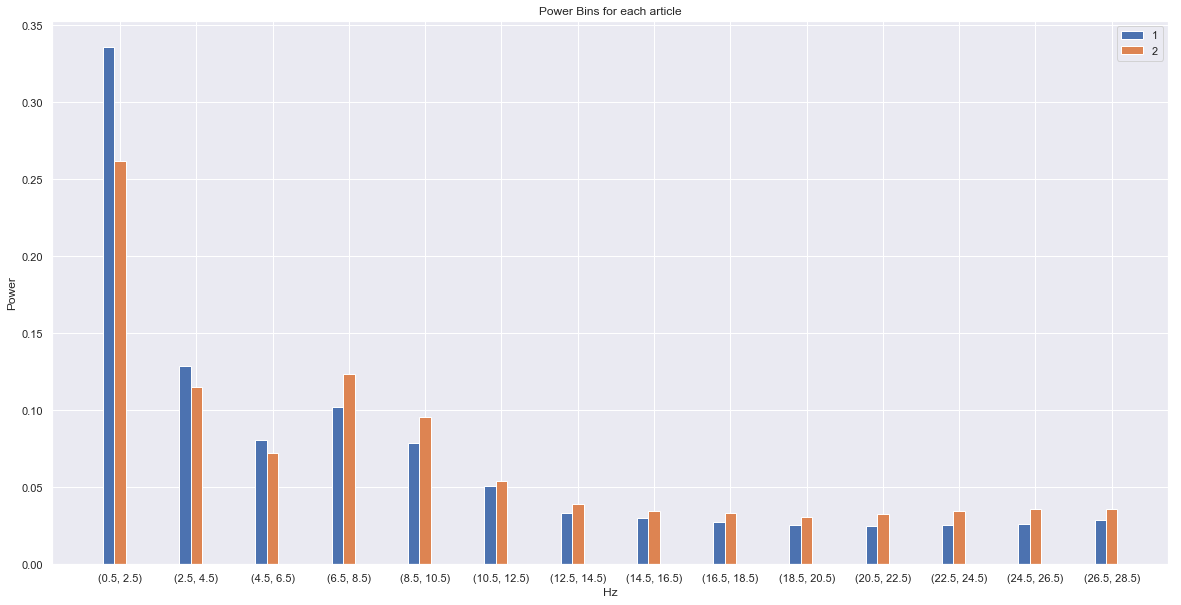

In [8]:
# Plot power bins for each article
power_ratios = list()
# No Standard Error because only one article section 
for article_section in article_sections: 
    ratio_avg, SEM_power_ratio = getPowerRatioAvgSEM(getEEGFromDataList_AvgLeftRight([article_section]), num_eeg_timepoints=-1)
    power_ratios.append(ratio_avg)

plt.figure(figsize=(20,10))
plotMultipleBarGraphs(power_ratios, 0.15, list(range(1, 1+ len(article_sections))), full_intervals, title="Power Bins for each article", xlabel="Hz", ylabel="Power")



In [21]:
# Create a binning interval
sub_binning=[2, 5, 8, 12, 30]
sub_intervals = getIntervals(sub_binning)



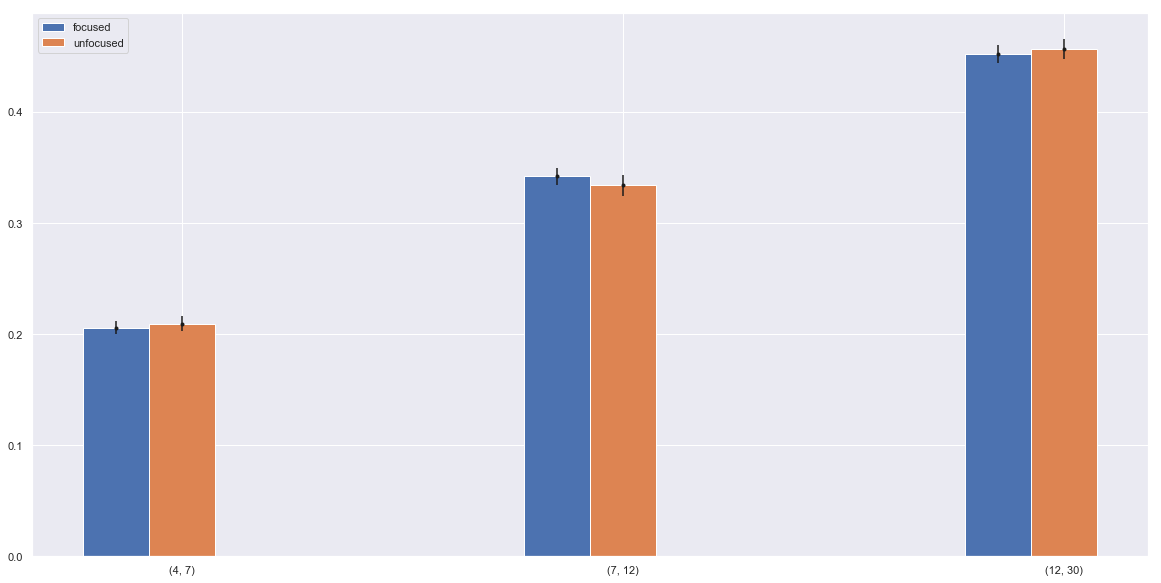

In [22]:
# Calculate power ratio from data frame for different trial groups


unfocused_df = df[df["trial_time"] > 0.9 ] # df[df["is_target"] == False ]#df[((df["is_pressed"] == False) & (df["is_target"] == True))]
unfocused_ratio_avg, unfocused_sem = getPowerRatioAvgSEM(getEEGFromDataFrame_AvgLeftRight(unfocused_df, data_type=data_type), num_eeg_timepoints=-1, binning=sub_binning) 


focused_df = df[df["trial_time"] == 0.7 ] # df[df["is_target"] == True ] # df[((df["is_pressed"] == True) & (df["is_target"] == True))]
focused_ratio_avg, focused_sem = getPowerRatioAvgSEM(getEEGFromDataFrame_AvgLeftRight(focused_df, data_type=data_type), num_eeg_timepoints=-1, binning=sub_binning) 


plt.figure(figsize=(20,10))

plotMultipleBarGraphs([focused_ratio_avg, unfocused_ratio_avg], 0.15, ["focused", "unfocused"], sub_intervals, error_values=[focused_sem, unfocused_sem])


In [23]:
len(unfocused_df)

201

In [12]:
# Plot super focused

"""super_focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_focused_ratio_avg, super_focused_sem = getPowerRatioAvgSEM(getEEGFromDataFrame_AvgLeftRight(super_focused_df, data_type=data_type), num_eeg_timepoints=-1, binning=sub_binning) 


super_unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_unfocused_ratio_avg, super_unfocused_sem = getPowerRatioAvgSEM(getEEGFromDataFrame_AvgLeftRight(super_unfocused_df, data_type=data_type), num_eeg_timepoints=-1, binning=sub_binning) 


mispress_df = df[((df["is_pressed"] == True) & (df["is_target"] == False))]
mispress_ratio_avg, mispress_sem = getPowerRatioAvgSEM(getEEGFromDataFrame_AvgLeftRight(mispress_df, data_type=data_type), num_eeg_timepoints=-1, binning=sub_binning) 




plt.figure(figsize=(20,10))

plotMultipleBarGraphs([super_unfocused_ratio_avg, unfocused_ratio_avg, focused_ratio_avg, super_focused_ratio_avg], 0.15, ["super unfocused","unfocused", "focused", "super focused"], sub_intervals, error_values=[super_unfocused_sem, unfocused_sem, focused_sem, super_focused_sem])




""";

